In [1]:
from pathlib import Path
import gym
import torch
from torch import nn

from data_control import EnvironmentLoader, MyDataset
from training_main import Trainer
from hcnn import HCNN
import matplotlib
%matplotlib inline

### Create the Training Data

In [6]:
environment = gym.make('CartPole-v0')
saving_destination_directory = Path("stop_if_done")
data_loader = EnvironmentLoader(saving_destination_directory)
data_loader.create_data(environment, stop=10_000)

Creating Training data:  21%|█████████████▎                                                 | 2121/10000 [00:02<00:08, 935.57it/s]


KeyboardInterrupt: 

### TODO: Create the HCNN forward pass
Do not forget to scale the predictions of the forward pass.


In [2]:
class MyHcnn(nn.Module):
    def __init__(self, input_size, hidden_dim, std=None, mean=None, activation=nn.Tanh()):
        super().__init__()
        self.input_size = input_size  # Data Dimension of observation
        if std is None:
            std = torch.zeros(self.input_size)
        if mean is None:
            mean = torch.zeros(self.input_size)
        self.hidden_dim = hidden_dim  # e.g. 50 size of hidden layer (= number of neurons in hidden layer)
        # input with action, output without action
        self.A = torch.nn.Linear(in_features=self.hidden_dim + 1, out_features=self.hidden_dim, bias=False)
        identity = torch.cat(
            (torch.eye(self.input_size), torch.zeros(self.hidden_dim - self.input_size, self.input_size)), dim=0)
        self.register_buffer('Id', identity)  # Register in the Module -> same device, and saving to state_dict
        self.activation_function = activation
        self.register_buffer('std', std)
        self.register_buffer('mean', mean)

        self.get_predicted_sequence = []

        # initial bias
        self.init_state = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
        torch.nn.init.normal_(self.init_state, std=0.1)  # normal distribution of the init state

    def forward(self, input_seq, state=None):
        """
        Takes an input sequence, feeds it through the network and outputs a prediction for time step sequence+1
        :param input_seq:
        :param state:
        :return:
        """

        # find initial state for first step of sequence
        if state is None:
            state = self.init_state.clone()
            # set top 4 neurons to be input data
            state[:self.input_size] = input_seq[0][1:]

        scaled_prediction = torch.zeros(4).float()
        for step in input_seq:
            pass
            #### TODO ####
            
        return scaled_prediction, state  # pred_observation: size 4, next_network_state: size 50

    def scale_observation(self, observation):
        scaled_prediction = torch.mul(observation, self.std).float()
        scaled_prediction = torch.add(scaled_prediction, self.mean).float()
        return scaled_prediction

    @staticmethod
    def get_action(data_at_time_step, converted=False):
        action = data_at_time_step[0]
        if converted and action == 0:  # converts action 0 to action -1
            # TODO: change action in data generation (or loading) to only include -1 and 1
            action = torch.tensor(-1)
        return action

### Load the Data Set

In [3]:
ds = MyDataset(10000)

Loading data: 100%|██████████████████████████████████████████████████████████████████████████| 9999/9999 [00:22<00:00, 442.48it/s]


### HCNN Training
TODO: 
1. Use your model  

Training:   0%|                                                                                           | 0/100 [00:00<?, ?it/s]

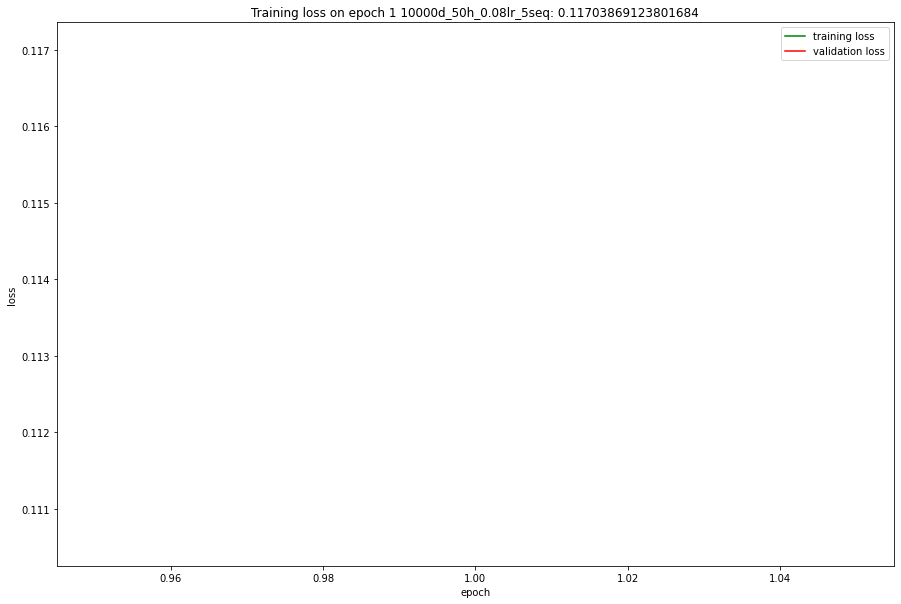

Training:   5%|████▏                                                                              | 5/100 [01:17<24:30, 15.48s/it]

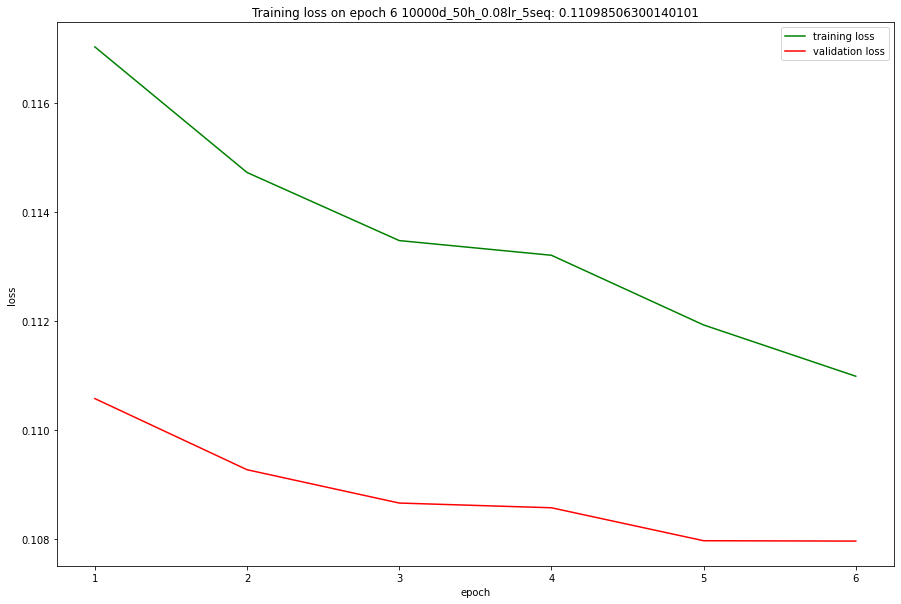

Training:   9%|███████▍                                                                           | 9/100 [02:21<24:23, 16.09s/it]

In [ ]:
# Set Hyperparameters
input_size = 4
hidden_dim = 50
std_training_data = ds.std
mean_training_data = ds.mean
training = Trainer(data_set=ds)
training.visualizer.use_jupyter = True
training.model = MyHcnn(input_size=input_size, hidden_dim=hidden_dim, std=std_training_data,
                          mean=mean_training_data).float()
training.train()

